# L(2,1) Welsh Powell Implementation

Emma's pseudocode:

- Let C be the set of nodes that are currently in the running for being colored
- Begin with all nodes in C
- Choose highest degree node, color it the first color
- Remove that node and the 1st and 2nd degree adjacencies of that node from C
- Choose next highest degree node from C, remove 1st and 2nd adjacencies
- Continue until C = emptyset
- Add the 2nd degree adjacencies back into C
- Repeat the process with the next color
- After this one, also add the 1st degree adjacencies from the first color back in
- Continue until all nodes are colored

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [93]:
# G = nx.cycle_graph(20) #sample graph to use

# orderFull = sorted(G.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

# #get just vertices in order
# order = []
# for i in range(len(orderFull)):
#     order.append(orderFull[i][0])

# colorings = {}
# Color = 0

In [92]:
#couldn't get this to work
# node= 0
# radius = 2
# new_graph = nx.generators.ego_graph(G, node, radius=radius)
# new_poss = nx.Graph()
# print(new_graph.edges())
# print(G.edges())
# x = list(new_graph.edges()) not in list(G.edges())
# print(x)
# #new_poss.add_edges_from(new_graph.edges() not in G.edges())
# #nx.draw(new_graph, with_labels = True)

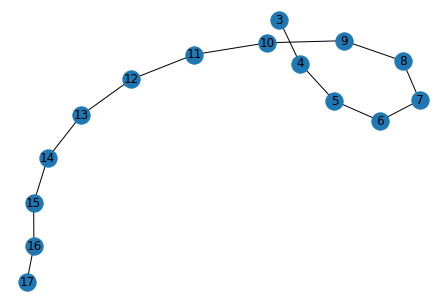

In [78]:
#get 1st and 2nd adjacencies of vertex
# vertex = 0
# adj = []
# adj_1 = list(G.neighbors(vertex))
# for node in adj_1:
#     for adj_2 in list(G.neighbors(node)):
#         if adj_2 not in adj:
#             adj.append(adj_2)

# for node in adj_1:
#     if node not in adj:
#         adj.append(node)

# #make a copy of original graph
# G1 = G.__class__()
# G1.add_nodes_from(G)
# G1.add_edges_from(G.edges)

# #delete 1st and 2nd adjacencies
# G1.remove_nodes_from(adj)

# nx.draw(G1, with_labels = True)

DONE WITH RECURSION, G is empty
{0: 0, 4: 0, 7: 0, 10: 0, 13: 0, 16: 0}


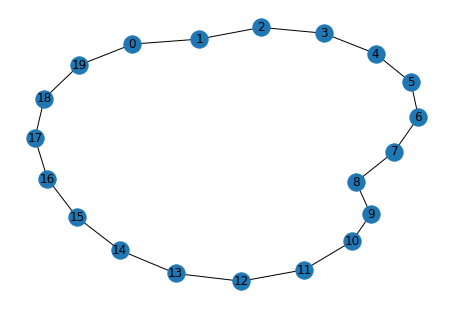

In [3]:
#trying recurisve function to delete 1st and 2nd adjacencies
#function colors node w/ max degree the current color

G = nx.cycle_graph(20) #sample graph to use
colorings = {}
color = 0
def remove_1_2(graph, center):
    '''
    graph: graph we are passing in
    center: node to delete off of (node with max degree)
    
    recursively colors max degree vertex and removes 1st and 2nd adjacencies until graph is empty
    '''
    
    
    
    orderFull = sorted(graph.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

    #get just vertices in order
    order = []
    for i in range(len(orderFull)):
        order.append(orderFull[i][0])
    
    
    colorings.update({order[0]: color}) #color max node current color
    adj = [] #initialize list of adjacent vertices (will hold 1st and 2nd adjacencies)
    adj_1 = list(graph.neighbors(center)) #1st adjancies of center
    for node in adj_1: #add 1st adjancies to adj
        adj.append(node)
    
    #add 2nd adjacencies of center to adj
    for node in adj_1:
        for adj_2 in list(graph.neighbors(node)):
            if adj_2 not in adj: #only need set of adjacencies
                adj.append(adj_2)
    
    #make copy of inputted graph
    G1 = graph.__class__()
    G1.add_nodes_from(graph)
    G1.add_edges_from(graph.edges)
    
    #remove 1st and 2nd adjacent vertices (and their edges)
    G1.remove_nodes_from(adj)
    
    #update order based on what is deleted
    order = [x for x in order if x not in adj]
    
    #call function again if graph is not empty
    if not nx.is_empty(G1):
        remove_1_2(G1, order[0])
    else:
        print('DONE WITH RECURSION, G is empty')


remove_1_2(G, 0)
nx.draw(G, with_labels = True)
print(colorings)

Emma's try...

{0: ['curr2nd', 'curr2nd'], 1: ['curr1st'], 2: ['curr2nd'], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: ['curr2nd'], 19: ['curr1st']}


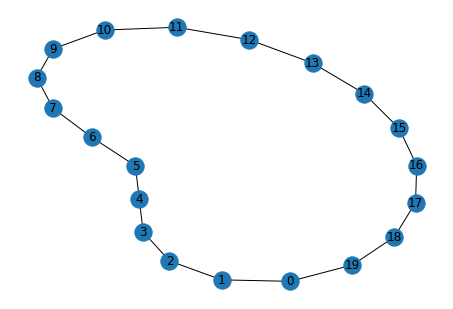

In [28]:
G = nx.cycle_graph(20) #sample graph to use
colorings = {}
color = 0
node_status = {} #structure is -- node:["prev1st","curr1st","curr2nd"]
for node in G.nodes():
    node_status[node] = []

orderFull = sorted(G.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree
#get just vertices in order. trusting sam that this is necessary, will question it later
order = []
for i in range(len(orderFull)):
    order.append(orderFull[i][0])
        


center = order[0]
colorings[center] = color #color max node current color

# add 1st adjacencies of center to node_status
adj_1 = list(G.neighbors(center))
for node in adj_1:
    node_status[node].append("curr1st")
#add 2nd adjacencies of center to node_status
for node in adj_1:
    for adj_2 in list(G.neighbors(node)):
        node_status[adj_2].append("curr2nd")



print(node_status)
            
            
nx.draw(G, with_labels = True)

In [ ]:
#UNSURE ABOUT: multiple instances of curr2nd and what that means for the next round. Need whitboard and brain.